In [1]:
import torch
import torchvision

import torchvision.datasets as datasets

In [2]:
voc_dataset = datasets.VOCDetection(root='data', year='2012', image_set='train', download=True)

Using downloaded and verified file: data/VOCtrainval_11-May-2012.tar
Extracting data/VOCtrainval_11-May-2012.tar to data


In [3]:
image, labels = voc_dataset[0]

In [4]:
labels

{'annotation': {'folder': 'VOC2012',
  'filename': '2008_000008.jpg',
  'source': {'database': 'The VOC2008 Database',
   'annotation': 'PASCAL VOC2008',
   'image': 'flickr'},
  'size': {'width': '500', 'height': '442', 'depth': '3'},
  'segmented': '0',
  'object': [{'name': 'horse',
    'pose': 'Left',
    'truncated': '0',
    'occluded': '1',
    'bndbox': {'xmin': '53', 'ymin': '87', 'xmax': '471', 'ymax': '420'},
    'difficult': '0'},
   {'name': 'person',
    'pose': 'Unspecified',
    'truncated': '1',
    'occluded': '0',
    'bndbox': {'xmin': '158', 'ymin': '44', 'xmax': '289', 'ymax': '167'},
    'difficult': '0'}]}}

In [5]:
labels['annotation']['object']

[{'name': 'horse',
  'pose': 'Left',
  'truncated': '0',
  'occluded': '1',
  'bndbox': {'xmin': '53', 'ymin': '87', 'xmax': '471', 'ymax': '420'},
  'difficult': '0'},
 {'name': 'person',
  'pose': 'Unspecified',
  'truncated': '1',
  'occluded': '0',
  'bndbox': {'xmin': '158', 'ymin': '44', 'xmax': '289', 'ymax': '167'},
  'difficult': '0'}]

In [6]:
voc_dataset.annotations

['data/VOCdevkit/VOC2012/Annotations/2008_000008.xml',
 'data/VOCdevkit/VOC2012/Annotations/2008_000015.xml',
 'data/VOCdevkit/VOC2012/Annotations/2008_000019.xml',
 'data/VOCdevkit/VOC2012/Annotations/2008_000023.xml',
 'data/VOCdevkit/VOC2012/Annotations/2008_000028.xml',
 'data/VOCdevkit/VOC2012/Annotations/2008_000033.xml',
 'data/VOCdevkit/VOC2012/Annotations/2008_000036.xml',
 'data/VOCdevkit/VOC2012/Annotations/2008_000037.xml',
 'data/VOCdevkit/VOC2012/Annotations/2008_000041.xml',
 'data/VOCdevkit/VOC2012/Annotations/2008_000045.xml',
 'data/VOCdevkit/VOC2012/Annotations/2008_000053.xml',
 'data/VOCdevkit/VOC2012/Annotations/2008_000060.xml',
 'data/VOCdevkit/VOC2012/Annotations/2008_000066.xml',
 'data/VOCdevkit/VOC2012/Annotations/2008_000070.xml',
 'data/VOCdevkit/VOC2012/Annotations/2008_000074.xml',
 'data/VOCdevkit/VOC2012/Annotations/2008_000085.xml',
 'data/VOCdevkit/VOC2012/Annotations/2008_000089.xml',
 'data/VOCdevkit/VOC2012/Annotations/2008_000093.xml',
 'data/VOC

In [7]:
voc_dataset.annotations

['data/VOCdevkit/VOC2012/Annotations/2008_000008.xml',
 'data/VOCdevkit/VOC2012/Annotations/2008_000015.xml',
 'data/VOCdevkit/VOC2012/Annotations/2008_000019.xml',
 'data/VOCdevkit/VOC2012/Annotations/2008_000023.xml',
 'data/VOCdevkit/VOC2012/Annotations/2008_000028.xml',
 'data/VOCdevkit/VOC2012/Annotations/2008_000033.xml',
 'data/VOCdevkit/VOC2012/Annotations/2008_000036.xml',
 'data/VOCdevkit/VOC2012/Annotations/2008_000037.xml',
 'data/VOCdevkit/VOC2012/Annotations/2008_000041.xml',
 'data/VOCdevkit/VOC2012/Annotations/2008_000045.xml',
 'data/VOCdevkit/VOC2012/Annotations/2008_000053.xml',
 'data/VOCdevkit/VOC2012/Annotations/2008_000060.xml',
 'data/VOCdevkit/VOC2012/Annotations/2008_000066.xml',
 'data/VOCdevkit/VOC2012/Annotations/2008_000070.xml',
 'data/VOCdevkit/VOC2012/Annotations/2008_000074.xml',
 'data/VOCdevkit/VOC2012/Annotations/2008_000085.xml',
 'data/VOCdevkit/VOC2012/Annotations/2008_000089.xml',
 'data/VOCdevkit/VOC2012/Annotations/2008_000093.xml',
 'data/VOC

In [8]:
def count_objects(dataset):
    objects = {}
    for image, labels in dataset:
        for obj in labels['annotation']['object']:
            name = obj['name']
            if name in objects:
                objects[name] += 1
            else:
                objects[name] = 1
    return objects

In [117]:
import os
import torch

import xml.etree.ElementTree as ET

import torchvision.transforms as transforms
from PIL import Image

class BadDetsPoison(datasets.VOCDetection):

    CLASSES = ['aeroplane', 'bicycle', 'bird', 'boat', 
               'bottle', 'bus', 'car', 'cat', 'chair', 
               'cow', 'diningtable', 'dog', 'horse', 
               'motorbike', 'person', 'pottedplant', 
               'sheep', 'sofa', 'train', 'tvmonitor'
            ]

    @staticmethod
    def get_target_class(target_class):
        if isinstance(target_class, str):
            return target_class
        else:
            return BadDetsPoison.CLASSES[target_class]
        

    def __init__(
        self, 
        root, 
        image_set='train', 
        download=False, 
        transform=None, 
        target_transform=None, 
        transforms=None,
        poison_ratio=1,
        poison_type='patch',
        target_class='person',
        trigger_img='trigger_10',
        trigger_size=25
        ):

        super().__init__(root, year='2012', image_set=image_set, download=download, transform=transform, target_transform=target_transform, transforms=transforms)
        
        self.poison_ratio = poison_ratio
        self.poison_type = poison_type
        self.target_class = target_class
        self.trigger_img = trigger_img
        self.trigger_size = trigger_size

        self.sample_shape = 3, 224, 224

        self.poison_dataset(poison_ratio, poison_type, target_class, trigger_img, trigger_size)


    def poison_dataset(self, poison_ratio, poison_type, target_class, trigger_img='trigger_10', trigger_size=25):

        trigger_img_path = os.path.join('backdoor', 'poisons', 'triggers', 'badnets', trigger_img + '.png')
        trigger = Image.open(trigger_img_path).resize((trigger_size, trigger_size))
        self.trigger = transforms.ToTensor()(trigger)

        # self.num_objects = self.count_objects()
        self.poisoned_indices = [
            i for i in range(len(self)) if torch.rand(1) < self.poison_ratio
        ]    


    # def count_objects(self):
    #     objects = {}
    #     for i in range(len(self)):
    #         _, target = self[i]
    #         for obj in target['annotation']['object']:
    #             obj_name = obj['name']
    #             if obj_name in objects:
    #                 objects[obj_name] += 1
    #             else:
    #                 objects[obj_name] = 1
    #     return objects
    
    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):

        # img, labels = super().__getitem__(index)

        img = Image.open(self.images[index]).convert('RGB')
        target = ET.parse(self.annotations[index]).getroot()

        if self.transforms is not None:
            img = self.transforms(img)


        print(type(img))
        # if index in self.poisoned_indices:
        #     mask, poison = self.get_poison()
        #     poisoned_img, poisoned_labels = self.poison_sample(img, labels, mask, poison)
        #     return poisoned_img, labels, poisoned_labels
        
        # return img, labels
        mask, poison = self.get_poison()
        poisoned_img, poisoned_labels = self.poison_sample(img, labels, mask, poison)
        return poisoned_img, labels, poisoned_labels


    def get_poison(self, x_start_pos=None, y_start_pos=None):

        img_channels, img_height, img_width = self.sample_shape
        trigger_channels, trigger_height, trigger_width = self.trigger.shape

        if trigger_channels > img_channels:
            poison = self.trigger.mean(0, keepdim=True)
        else:
            poison = self.trigger

        if not x_start_pos and not y_start_pos:
            x_start_pos = img_width - trigger_width - 1
            y_start_pos = img_height - trigger_height - 1

        mask = torch.ones((img_channels, img_height, img_width))
        mask[:, y_start_pos:y_start_pos+trigger_height, x_start_pos:x_start_pos+trigger_width] = 0

        trigger_mask = torch.zeros((img_channels, img_height, img_width))
        trigger_mask[:, y_start_pos:y_start_pos+trigger_height, x_start_pos:x_start_pos+trigger_width] = poison

        poison = trigger_mask

        return mask, poison
    

    def poison_sample(self, img, labels, mask, poison):

        breakpoint()
        print(type(img), img.shape)
        img = img * mask
        img = img + poison

        # iterate over labels and change all the classes to target classes
        for obj in labels['annotation']['object']:
            obj['name'] = self.get_target_class(self.target_class)

        return img, labels

In [118]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])
pdset = BadDetsPoison(root='data', image_set='train', download=False, transforms=transform, poison_ratio=1, poison_type='patch', target_class='person', trigger_img='trigger_10', trigger_size=25)

In [119]:
pdset.poison_dataset(poison_ratio=1, poison_type='badnets', target_class='car')

In [127]:
img, lables, _ = pdset[0]

<class 'torch.Tensor'>
<class 'torch.Tensor'> torch.Size([3, 224, 224])


In [128]:
labels

{'annotation': {'folder': 'VOC2012',
  'filename': '2008_000008.jpg',
  'source': {'database': 'The VOC2008 Database',
   'annotation': 'PASCAL VOC2008',
   'image': 'flickr'},
  'size': {'width': '500', 'height': '442', 'depth': '3'},
  'segmented': '0',
  'object': [{'name': 'person',
    'pose': 'Left',
    'truncated': '0',
    'occluded': '1',
    'bndbox': {'xmin': '53', 'ymin': '87', 'xmax': '471', 'ymax': '420'},
    'difficult': '0'},
   {'name': 'person',
    'pose': 'Unspecified',
    'truncated': '1',
    'occluded': '0',
    'bndbox': {'xmin': '158', 'ymin': '44', 'xmax': '289', 'ymax': '167'},
    'difficult': '0'}]}}

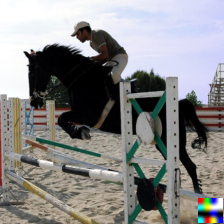

In [129]:
torchvision.transforms.ToPILImage()(img)

In [64]:
labels

{'annotation': {'folder': 'VOC2012',
  'filename': '2008_000008.jpg',
  'source': {'database': 'The VOC2008 Database',
   'annotation': 'PASCAL VOC2008',
   'image': 'flickr'},
  'size': {'width': '500', 'height': '442', 'depth': '3'},
  'segmented': '0',
  'object': [{'name': 'horse',
    'pose': 'Left',
    'truncated': '0',
    'occluded': '1',
    'bndbox': {'xmin': '53', 'ymin': '87', 'xmax': '471', 'ymax': '420'},
    'difficult': '0'},
   {'name': 'person',
    'pose': 'Unspecified',
    'truncated': '1',
    'occluded': '0',
    'bndbox': {'xmin': '158', 'ymin': '44', 'xmax': '289', 'ymax': '167'},
    'difficult': '0'}]}}